# Esej - Stavovi i navike tijekom pandemije COVID-19

S 29. ožujka ove godine završilo je dvogodišnje istraživanje o stavovima i navikama ljudi diljem svijeta kada je u pitanju trenutna pandemija. Ovo istraživanje, pokrenuto u suradnji sveučilišta __Imperial College London__ i kompanije __YouGov__, sastojalo se od prikupljanja odgovora stanovnika iz 29 odabranih svjetskih država na pitanja koja su usko vezana uz COVID pandemiju. Zdravstveni podaci, koliko su spremni nositi zaštitne maske za lice, stavovi oko cijepljenja, samoizolacija, izbjegavanje nepotrebnih putovanja, higijenske navike, kvaliteta života, rad od kuće i sl. -- ove teme do najsitnijih detalja.

Ideja istraživanja je omogućiti vlastima i zdravstvenim sustavima bolje strateško planiranje kada je u pitanju COVID-19 kriza.

Na stranici https://www.imperial.ac.uk/centre-for-health-policy/our-work/our-response-to-covid-19/covid-19-behaviour-tracker/ moguće je pronaći osnovne informacije o istraživanju, a na stranici https://github.com/YouGov-Data/covid-19-tracker nalazi se baza podataka koja obuhvaća odgovore (numeričke i nenumeričke) ispitanika, zajedno s pitanjima i pojašnjenjima.

### Pitanja od našeg interesa

__Analizirat ćemo odgovore__ na nekoliko pitanja zasebno. Pitanja od interesa su sljedeća:
<ol>
    <li>Koliko često je ispitanik unazad tjedan dana nosio <b>zaštitnu masku za lice</b> tijekom vožnje u javnom prijevozu?</li>
    <li>Slaže li se ispitanik s tvrdnjom da <b>cjepivo</b> protiv Covida-19 ni za koga <em>ne bi</em> trebalo biti obavezno?</li>
    <li>Koliko dana tjedno (u prosjeku) je ispitanik unazad mjesec dana <b>radio od kuće</b>?</li>
    <li>Je li ispitanik dan prije <b>izlazio iz kuće</b>? - <i>pitanje koje se postavljalo početnih nekoliko mjeseci pandemije</i></li>
    <li>Koliko se, na skali od 1 do 7, ispitanik slaže da je <b>Covid-19 vrlo opasan</b> po njega?</li>

Prikupljanje odgovora trajalo je __kontinuirano kroz dvije godine__. Kod onih pitanja kod kojih je to moguće bilo bi zanimljivo istražiti kako su se stavovi, odnosno discipliniranost i navike stanovništva, mijenjali tijekom pandemije. Odgovori su prikupljani zasebno po državama, stoga bismo to mogli učiniti za više od jedne države, paralelno, i usporediti dobivene rezultate.

### Dohvaćanje podataka

In [1]:
import pandas as pd

Recimo da želimo napraviti usporedbu razvoja situacije u državama na različitim kontinentima: __Japanu__, __Kanadi__ i __Danskoj__.

Dohvatimo __lokalno__ kopije tablica s podacima:

In [2]:
%time japan = pd.read_csv('japan.csv', low_memory=False, encoding='utf-8')
%time canada = pd.read_csv('canada.csv', low_memory=False, encoding='utf-8')
%time denmark = pd.read_csv('denmark.csv', low_memory=False, encoding='utf-8')

Wall time: 2.9 s
Wall time: 6.7 s
Wall time: 14.7 s


In [3]:
japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25997 entries, 0 to 25996
Columns: 422 entries, RecordNo to future_3
dtypes: float64(1), int64(2), object(419)
memory usage: 83.7+ MB


In [4]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48372 entries, 0 to 48371
Columns: 512 entries, RecordNo to future_3
dtypes: float64(1), int64(2), object(509)
memory usage: 189.0+ MB


Prikažimo kratko kako tablice izgledaju. Uz neke osnovne informacije o samom ispunjavanju upitnika, svaki stupac u tablicama predstavlja __odgovore__ ispitanika na pojedino pitanje:

In [5]:
japan.head(3)

,RecordNo,endtime,qweek,gender,region,i1_health,i2_health,i7a_health,i5a_health,i6_health,...,vac_man_96,vac_man_99,q_other,had_covid,vac_boost_beyond,future_1,future_2,had_covid_2,long_covid,future_3
0,1,02/04/2020 15:16,week 1,Male,Kantō,3,20,1,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,02/04/2020 15:15,week 1,Male,Kantō,1,20,1,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,02/04/2020 15:17,week 1,Male,Kantō,1,0,0,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
canada.head(3)

,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,...,vac_man_96,vac_man_99,q_other,had_covid,vac_boost_beyond,future_1,future_2,had_covid_2,long_covid,future_3
0,0,02/04/2020 08:25,week 1,0,1,1,"No, I have not","No, they have not",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/04/2020 08:34,week 1,0,6,0,"No, I have not","No, they have not",Yes,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,02/04/2020 08:44,week 1,6,1,0,"No, I have not","No, they have not",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


U tablici je svako pitanje označeno znakovnom šifrom, a njihovo značenje dostupno je u _codebooku_ kojeg je moguće preuzeti skupa s podacima.

### Sređivanje datumâ

S obzirom na to da će nas kod nekih pitanja zanimati tijek odgovora u ovisnosti o protoku vremena, promijenit ćemo tip podataka stupca '__endtime__' u _datetime_ oblik koji je pogodniji za daljnji rad.

Recimo da nas zanima kako su se odgovori mijenjali kroz mjesece, a ne kroz dane, dojma smo kako je ta granulacija optimalna. U tom slučaju možemo zanemariti dan u mjesecu te ostaviti samo __mjesec__ i __godinu__ ispunjavanja upitnika (za dan u mjesecu ćemo fiksirati `1`).

Provedimo sada postepenu pretvorbu u _datetime_ oblik. To ćemo učiniti koristeći vlastitu funkciju `pretvori` koja kao argument prima tablicu s podacima:

In [7]:
def pretvori(country):
    country.insert(1, 'month', '')    # Dodavanje stupca 'month' iza stupca 'endtime'
    country.insert(2, 'year', '')    # Dodavanje supca 'year' iza stupca 'month'
    country['month'] = country['endtime']
    country['year'] = country['endtime']
    
    month = {s: int(s[3:5]) for s in country['endtime']}
    year = {s: int(s[6:10]) for s in country['endtime']}
    country.replace({'month': month}, inplace=True)
    country.replace({'year': year}, inplace=True)
    
    # Stvaranje stupca 'date' iza stupca 'RecordNo' (za dan u mjesecu fiksirat cemo 1):
    country.insert(1, 'date', '')
    country['date'] = pd.to_datetime(dict(year=country['year'], month=country['month'], day=1))
    
    # Brisanje zasebnih stupaca 'endtime', 'month' i 'year' koji nam vise ne trebaju:
    del country['endtime'], country['month'], country['year']

Sada iskoristimo funkciju `pretvori` nad tablicama `japan`, `canada` i `denmark`.

_UPOZORENJE_: _izvršavanje idućih triju naredbi zbog velike količine podataka traje i do par minuta, stoga ne preporučam restartanje kernela, kao ni izvršavanje ćelija prije ove._

In [8]:
%time pretvori(japan)
%time pretvori(canada)
%time pretvori(denmark)

Wall time: 30.9 s
Wall time: 4min 31s
Wall time: 4min 54s
Parser   : 136 ms


_Od ovog mjesta, izvršavanje preostalih ćelija ne traje dugo te njihovo izvršavanje ne predstavlja vremenski problem._

Nad __sve tri tablice__ radimo jednake izmjene, stoga ćemo u nastavku povremeno prikazivati kako jedna od njih u danom trenutku izgleda:

In [9]:
japan.head(3)

,RecordNo,date,qweek,gender,region,i1_health,i2_health,i7a_health,i5a_health,i6_health,...,vac_man_96,vac_man_99,q_other,had_covid,vac_boost_beyond,future_1,future_2,had_covid_2,long_covid,future_3
0,1,2020-04-01,week 1,Male,Kantō,3,20,1,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-04-01,week 1,Male,Kantō,1,20,1,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2020-04-01,week 1,Male,Kantō,1,0,0,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Čišćenje podataka

Kako nam je trenutno samo nekoliko pitanja od interesa, možemo pročistiti podatke na način da u tablicama zadržimo samo stupce koji se odnose na ta pitanja. Iz _codebooka_ čitamo da se odgovori na naša pitanja nalaze u stupcima s oznakama '__i12_health_25__', '__vac_man_99__', '__WAH_2__', '__i7a_health__' te '__r1_1__', respektivno. Uz te stupce, zadržat ćemo još stupac '__endtime__' koji se odnosi na vrijeme ispunjavanja upitnika kako bismo mogli pratiti na koji način su se odgovori mijenjali kroz vrijeme. Za ovo čišćenje iskoristit ćemo vlastitu funkciju `cleanse`:

In [10]:
def cleanse(country, cols):
    for col in country.columns:    # Prolazimo po svim stupcima tablice
        if col not in cols:    # Cols su stupci koje cemo zadrzati
            del country[col]

Primijenimo funkciju `cleanse` nad tablicama:

In [11]:
cols = set(['date', 'i12_health_25', 'vac_man_99', 'WAH_2', 'i7a_health', 'r1_1'])

cleanse(japan, cols)
cleanse(canada, cols)
cleanse(denmark, cols)

In [12]:
japan

,date,i7a_health,i12_health_25,r1_1,WAH_2,vac_man_99
0,2020-04-01,1,,,NaN,NaN
1,2020-04-01,1,,,NaN,NaN
2,2020-04-01,0,,,NaN,NaN
3,2020-04-01,1,,,NaN,NaN
4,2020-04-01,1,,,NaN,NaN
...,...,...,...,...,...,...
25992,2022-03-01,,Always,1 – Disagree,I am unable to work from home,No
25993,2022-03-01,,Always,5,3 to 4 days,No
25994,2022-03-01,,Always,4,3 to 4 days,No
25995,2022-03-01,,Always,7 - Agree,0 days,No


Uočavamo bjeline ili neke besmislene odgovore u nekoliko početnih redaka stupaca koji se odnose na naša pitanja. Razlog tome je činjenica što je početak istraživanja bio __2. travnja 2020.__, a neka pitanja koja su od našeg interesa uvedena su u upitnik globalno nešto kasnije. Primjerice, pitanje koje se odnosi na nošenje maski u javnom prijevozu uvedeno je u upitnik tek krajem __lipnja 2020.__, dok je pitanje koje se odnosi na stav oko cijepljena uvedeno tek u __zadnjih pet mjeseci istraživanja__. Stupac '__i7a_health__' odnosi se na pitanje koje je tijekom istraživanja ispušteno iz upitnika, zato je u tom stupcu nekoliko zadnjih redaka prazno.

### Analiza prvog pitanja

Prisjetimo se prvog pitanja od našeg interesa:
- Koliko često je ispitanik unazad tjedan dana nosio __zaštitnu masku za lice__ tijekom vožnje u javnom prijevozu?

Mogući odgovori na ovo pitanje bili su:
- Uvijek
- Često
- Ponekad
- Rijetko
- Nikad

Prvo pitanje od interesa odnosi se na stupac '__i12_health_25__'.

In [13]:
japan['i12_health_25'].value_counts()

Always        19411
               3392
Not at all     1606
Frequently      810
Sometimes       515
Rarely          263
Name: i12_health_25, dtype: int64

Vidimo da su zapisani odgovori samo _Always_, _Frequently_, _Sometimes_, _Rarely_, _Not at all_ i bjelina, nema krivo unesenih odgovora te se to na isti način može provjeriti i za preostale dvije tablice.

Recimo da nas zanimaju udjeli ispitanika koji su na pitanje koliko su često u proteklih sedam dana nosili zaštitne maske odgovorili s "__Uvijek__". Za sve tri države prikazat ćemo graf udjela odgovora "__Uvijek__" u ovisnosti o mjesecima.

Na x-osi grafa nalazit će se oznake mjeseca. Ovo pitanje bilo je uključeno u upitnik od lipnja 2020. pa sve do kraja istraživanja, stoga ćemo napraviti da x-os bude lista ['06/20', '07/20', ..., '03/22']. To ćemo elegantno postići prolaskom kroz '__date__' stupac tablice.

In [14]:
x = []
temp = japan.copy()    # Privremena tablica (kopija) koju cemo malo modificirati sto ce nam olaksati izradu x-osi
temp = temp[temp['i12_health_25'] != ' ']    # Ostavljamo samo one retke (ispitanike) koji su odgovorili na ovo pitanje
dates = sorted(set(temp['date']))   # Sortiran skup svih datuma koji se pojavljuju u tablici temp nakon reduciranja
for i in dates:    # i je oblika '2020-06-01'
    s = ""
    s += str(i)[5:7] + "/"
    s += str(i)[2:4]
    # Dobili smo string oblika '06/20'
    x.append(s)

Od važnosti je bilo što smo oznake ubacivali kronološki. Naravno, sljedeća linija daje `False` jer smo podatke tipa _datetime_ konvertirali u stringove, čime se mijenja uređaj, stoga ne bismo mogli koristiti metodu `sort` za kronološko sortiranje oznaka:

In [15]:
y = x.copy()
y.sort()
y == x

False

Za svaki mjesec __zasebno__ izračunat ćemo spomenuti udio, a potom ga spremiti u listu koju ćemo na kraju iskoristiti kod y-osi za crtanje grafa. Iskoristit ćemo vlastitu funkciju `mask_percentages`:

In [16]:
def mask_percentages(country):
    lista = []
    
    for i in x:    # Za svaki mjesec ...
        temp = country.copy()    # Privremena tablica (kopija) koju cemo malo modificirati sto nam olaksava racunanje
        temp = temp[temp['date'].dt.month == int(i[:2])]    # Potreban nam je odgovarajuci mjesec
        temp = temp[temp['date'].dt.year == int("20" + i[3:])]    # Potrebna nam je odgovarajuca godina

        # U tablici temp ostavit cemo samo one ispitanike koji su odgovorili na pitanje:
        temp = temp[temp['i12_health_25'] != ' ']
        
        total = len(temp.index)    # Ukupan broj ispitanika u pripadnom mjesecu

        # U privremenoj tablici sada ostavljamo samo one ispitanike koji su na pitanje odgovorili s 'Always'
        temp = temp[temp['i12_health_25'] == 'Always']

        always = len(temp.index)    # Broj odgovora 'Uvijek' u pripadnom mjesecu

        lista.append(always / total)    # Spremi udio za pripadni mjesec u listu
    
    return lista

Nacrtajmo sada pripadne grafove:

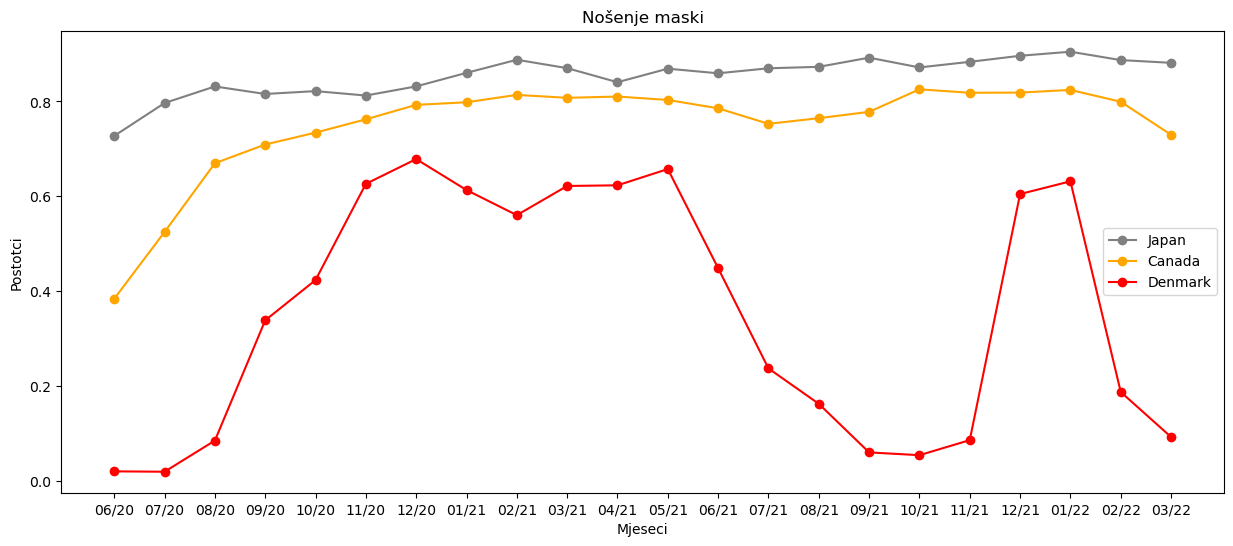

In [17]:
import matplotlib.pyplot as plt
%matplotlib agg

fig, ax = plt.subplots(figsize=(15, 6))
ax.set(title='Nošenje maski', xlabel='Mjeseci', ylabel='Postotci')
ax.plot(x, mask_percentages(japan), label='Japan', color='grey', marker='o')
ax.plot(x, mask_percentages(canada), label='Canada', color='orange', marker='o')
ax.plot(x, mask_percentages(denmark), label='Denmark', color='red', marker='o')
ax.legend(loc='best')
fig

### Analiza drugog pitanja

Drugo pitanje od našeg interesa glasilo je:
- Slaže li se ispitanik s tvrdnjom da cjepivo protiv Covida-19 __ne bi__ trebalo biti obavezno, ni za koga?

Na pitanje se odgovaralo sa '__da__' i '__ne__'. Ovo pitanje bilo je postavljano samo nekoliko zadnjih mjeseci istraživanja

In [18]:
japan

,date,i7a_health,i12_health_25,r1_1,WAH_2,vac_man_99
0,2020-04-01,1,,,NaN,NaN
1,2020-04-01,1,,,NaN,NaN
2,2020-04-01,0,,,NaN,NaN
3,2020-04-01,1,,,NaN,NaN
4,2020-04-01,1,,,NaN,NaN
...,...,...,...,...,...,...
25992,2022-03-01,,Always,1 – Disagree,I am unable to work from home,No
25993,2022-03-01,,Always,5,3 to 4 days,No
25994,2022-03-01,,Always,4,3 to 4 days,No
25995,2022-03-01,,Always,7 - Agree,0 days,No


Odgovori na ovo pitanje kriju se pod stupcem '__vac_man_99__'.

Opet, kao i kod analize prvog pitanja, korištenjem metode `value_counts` lako potvrdimo da nema krivo unešenih odgovora, odnosno da su zapisani samo odgovori _Yes_ i _No_.

In [19]:
japan['vac_man_99'].value_counts()

No     3088
Yes     926
Name: vac_man_99, dtype: int64

Retke u kojima je zapisano _NaN_ metoda `value_counts` očito zanemaruje.

Izračunajmo udjele odgovora 'Yes' te prikažimo odnose tih udjela:

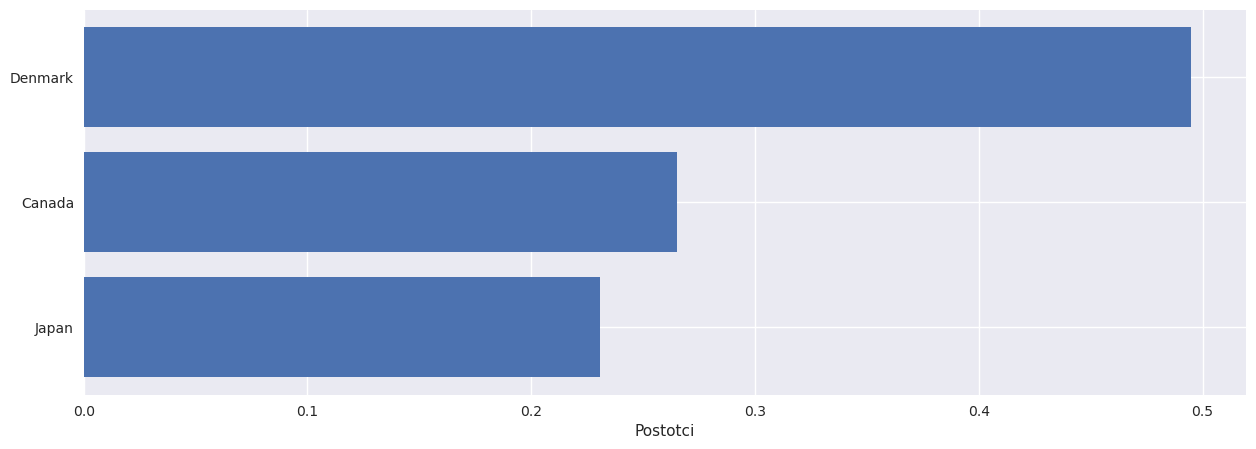

In [20]:
jpn = japan['vac_man_99'].value_counts()
can = canada['vac_man_99'].value_counts()
den = denmark['vac_man_99'].value_counts()

udjeli = {
    'Japan': jpn[1] / (jpn[0] + jpn[1]),
    'Canada': can[1] / (can[0] + can[1]),
    'Denmark': den[1] / (den[0] + den[1])
}

with plt.style.context('seaborn'):
    fig, dr = plt.subplots(figsize=(15, 5))
    dr.set(xlabel='Postotci')
    dr.barh(list(udjeli.keys()), list(udjeli.values()))
fig

### Analiza trećeg pitanja

Treće pitanje koje promatramo je:
- Koliko dana tjedno (u prosjeku) je ispitanik unazad mjesec dana __radio od kuće__?

Ovo pitanje bilo je postavljano samo u __listopadu 2021.__ i odnosi se na stupac '__WAH_2__'.

In [21]:
japan

,date,i7a_health,i12_health_25,r1_1,WAH_2,vac_man_99
0,2020-04-01,1,,,NaN,NaN
1,2020-04-01,1,,,NaN,NaN
2,2020-04-01,0,,,NaN,NaN
3,2020-04-01,1,,,NaN,NaN
4,2020-04-01,1,,,NaN,NaN
...,...,...,...,...,...,...
25992,2022-03-01,,Always,1 – Disagree,I am unable to work from home,No
25993,2022-03-01,,Always,5,3 to 4 days,No
25994,2022-03-01,,Always,4,3 to 4 days,No
25995,2022-03-01,,Always,7 - Agree,0 days,No


In [22]:
japan['WAH_2'].value_counts()

                                 5569
0 days                            313
I am unable to work from home     289
5+ days                           123
1 to 2 days                       123
3 to 4 days                       112
Name: WAH_2, dtype: int64

Vidimo broj pojedinih odgovora, nema krivo unesenih odgovora i opet na isti način to možemo provjeriti za preostale dvije tablice. Kao i ranije, __bjeline__ označavaju one ispitanike kojima ovo pitanje nije bilo postavljeno.

Recimo da nas zanimaju udjeli onih ispitanika su u potpunosti radili od kuće. Promatrat ćemo udjele odgovora "__5 ili više dana__". Izračunajmo udjele tih odgovora u ukupnom broju odgovora, slično kao i kod analize drugog pitanja. Definiramo funkciju `wah_percentages` koja za danu državu računa udio:

In [23]:
def percentage(country):  
    total = 0    # Varijabla u kojoj ce biti ukupan broj ispitanika koji su odgovorili na pitanje
    # U tablici temp ostavit cemo samo one ispitanike koji su odgovorili na pitanje:
    for i in range(1, len(japan['WAH_2'].value_counts())): 
        total += japan['WAH_2'].value_counts()[i]
           
    # U privremenoj tablici temp sada ostavljamo samo one ispitanike koji su na pitanje odgovorili s '5+ days'
    temp = country.copy()
    temp = temp[temp['WAH_2'] == '5+ days']
    
    amount = len(temp.index)    # Broj odgovora '5+ days'
    
    return amount / total

Izračunajmo udjele i prikažemo odnose tih udjela:

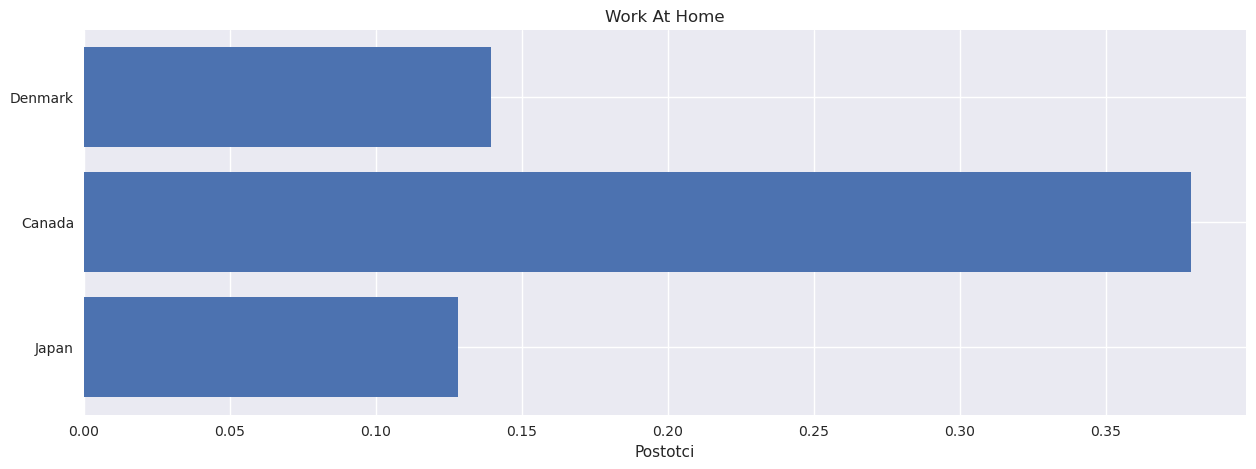

In [24]:
udjeli = {
    'Japan': percentage(japan),
    'Canada': percentage(canada),
    'Denmark': percentage(denmark)
}

with plt.style.context('seaborn'):
    fig, dr = plt.subplots(figsize=(15, 5))
    dr.set(title='Work At Home', xlabel='Postotci')
    dr.barh(list(udjeli.keys()), list(udjeli.values()))
fig

### Analiza četvrtog pitanja

Četvrto pitanje koje promatramo je:
- Koliko je ispitanik dan prije __izlazio iz kuće__?

Ovo pitanje nekako najviše smisla ima u začetku pandemije, odnosno u vrijeme _lockdowna_. Zato se je i postavljalo u prvoj polovici istraživanja, do, uključno, __srpnja 2021.__

Odnosi se na stupac '__i7a_health__', a mogući odgovori bili su cijeli brojevi u rasponu od 0 do 100.

In [25]:
japan

,date,i7a_health,i12_health_25,r1_1,WAH_2,vac_man_99
0,2020-04-01,1,,,NaN,NaN
1,2020-04-01,1,,,NaN,NaN
2,2020-04-01,0,,,NaN,NaN
3,2020-04-01,1,,,NaN,NaN
4,2020-04-01,1,,,NaN,NaN
...,...,...,...,...,...,...
25992,2022-03-01,,Always,1 – Disagree,I am unable to work from home,No
25993,2022-03-01,,Always,5,3 to 4 days,No
25994,2022-03-01,,Always,4,3 to 4 days,No
25995,2022-03-01,,Always,7 - Agree,0 days,No


In [26]:
japan['i7a_health'].value_counts()

       9066
1      8608
2      3330
0      2830
3      1061
5       388
4       281
7       188
6        95
10       49
8        21
15       10
20        7
100       7
30        6
9         6
14        5
25        3
23        3
22        3
12        3
11        2
13        2
50        2
90        2
80        2
99        2
71        1
65        1
17        1
18        1
52        1
70        1
28        1
16        1
51        1
55        1
46        1
19        1
38        1
32        1
34        1
Name: i7a_health, dtype: int64

Recimo da nas zanimaju udjeli ispitanika koji su na ovo pitanje odgovorili s "__0__", odnosno onih ispitanika koji dan prije nisu izlazili iz kuće. Za sve tri države prikazat ćemo graf udjela odgovora "__0__" u ovisnosti o mjesecima, kao i kod analize prvog pitanja. U vrijeme _lockdowna_ prirodno je očekivati veći udio takvih odgovora.

Na x-osi grafa nalazit će se oznake mjeseca. Ovo pitanje bilo je uključeno u upitnik od početka istraživanja, odnosno __travnja 2020.__ pa do kraja __srpnja 2021.__

Napravit ćemo da x-os bude lista ['04/20', '07/20', ..., '07/21']. To ćemo opet elegantno postići prolaskom kroz '__date__' stupac tablice.

In [27]:
x.clear()
temp = japan.copy()    # Privremena tablica (kopija) koju cemo malo modificirati sto ce nam olaksati izradu x-osi
temp = temp[temp['i7a_health'] != ' ']    # Ostavljamo samo one retke (ispitanike) koji su odgovorili na ovo pitanje
dates = sorted(set(temp['date']))   # Sortiran skup svih datuma koji se pojavljuju u tablici temp nakon reduciranja
for i in dates:    # i je oblika '2020-04-01'
    s = ""
    s += str(i)[5:7] + "/"
    s += str(i)[2:4]
    # Dobili smo string oblika '04/20'
    x.append(s)

Posljednji mjesec u kojem je ovo pitanje postojalo u upitniku možemo zanemariti zbog mogućeg premalog uzorka u odnosu na ostale mjesece:

In [28]:
x.pop()

'07/21'

Za svaki mjesec __zasebno__ izračunat ćemo spomenuti udio, a potom ga spremiti u listu koju ćemo na kraju iskoristiti kod y-osi za crtanje grafa. Iskoristit ćemo vlastitu funkciju `exit_percentages`:

In [29]:
def exit_percentages(country):
    lista = []
    
    for i in x:    # Za svaki mjesec ...
        temp = country.copy()    # Privremena tablica (kopija) koju cemo malo modificirati sto nam olaksava racunanje
        temp = temp[temp['date'].dt.month == int(i[:2])]    # Potreban nam je odgovarajuci mjesec
        temp = temp[temp['date'].dt.year == int("20" + i[3:])]    # Potrebna nam je odgovarajuca godina

        # U tablici temp ostavit cemo samo one ispitanike koji su odgovorili na pitanje:
        temp = temp[temp['i7a_health'] != ' ']
        
        total = len(temp.index)    # Ukupan broj ispitanika u pripadnom mjesecu

        # U privremenoj tablici sada ostavljamo samo one ispitanike koji su na pitanje odgovorili s '0'
        temp = temp[temp['i7a_health'] == '0']

        always = len(temp.index)    # Broj odgovora '0' u pripadnom mjesecu

        lista.append(always / total)    # Spremi udio za pripadni mjesec u listu
    
    return lista

Nacrtajmo sada pripadne grafove:

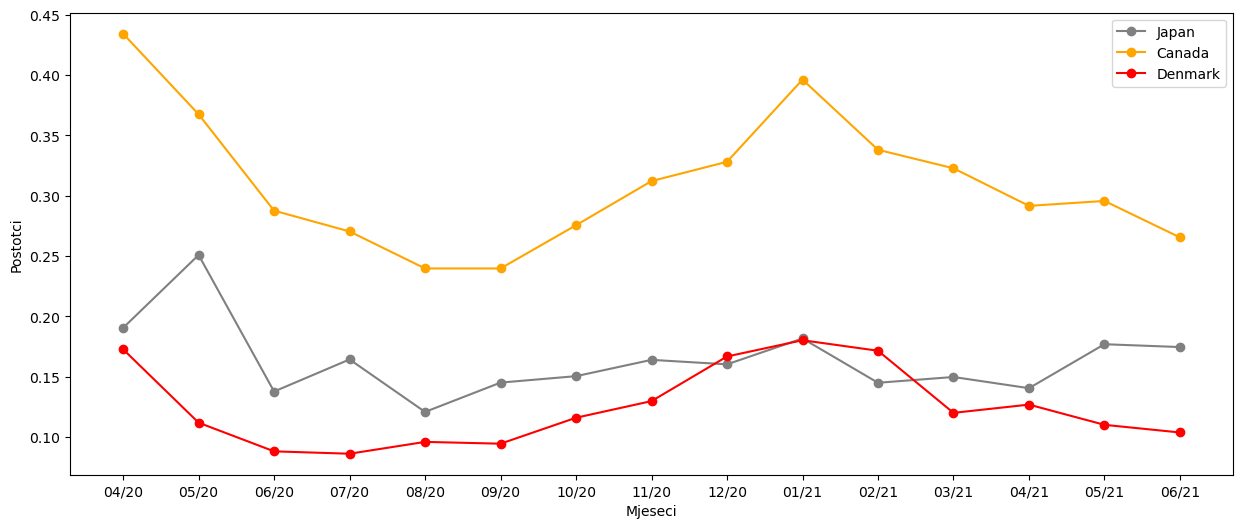

In [30]:
import matplotlib.pyplot as plt
%matplotlib agg

fig, ax = plt.subplots(figsize=(15, 6))
ax.set(xlabel='Mjeseci', ylabel='Postotci')
ax.plot(x, exit_percentages(japan), label='Japan', color='grey', marker='o')
ax.plot(x, exit_percentages(canada), label='Canada', color='orange', marker='o')
ax.plot(x, exit_percentages(denmark), label='Denmark', color='red', marker='o')
ax.legend(loc='best')
fig

Zaista, uočavamo manji udio odgovora '__0__' u vrijeme ljetnih mjeseci, a nešto veći udio odgovora '__0__' tijekom zimskih mjeseci (i lošijih pandemijskih brojki).

### Analiza petog pitanja

Za kraj, peto pitanje od našeg interesa je:
- Koliko se, na skali od 1 do 7, ispitanik slaže da je __Covid-19 vrlo opasan__ po njega?

Odgovor '7' označava slaganje u najvećem smislu. Ovo pitanje je bilo uključeno u upitnik od __lipnja 2020.__ do kraja dvogodišnjeg istraživanja.

Odnosi se na stupac '__r1_1__'.

In [31]:
japan

,date,i7a_health,i12_health_25,r1_1,WAH_2,vac_man_99
0,2020-04-01,1,,,NaN,NaN
1,2020-04-01,1,,,NaN,NaN
2,2020-04-01,0,,,NaN,NaN
3,2020-04-01,1,,,NaN,NaN
4,2020-04-01,1,,,NaN,NaN
...,...,...,...,...,...,...
25992,2022-03-01,,Always,1 – Disagree,I am unable to work from home,No
25993,2022-03-01,,Always,5,3 to 4 days,No
25994,2022-03-01,,Always,4,3 to 4 days,No
25995,2022-03-01,,Always,7 - Agree,0 days,No


In [32]:
japan['r1_1'].value_counts()

7 - Agree       7213
5               4606
4               4043
6               3609
                3392
3               1482
1 – Disagree     874
2                778
Name: r1_1, dtype: int64

Unešeni odgovori su, dakle, opet smisleni. Također, ponovno uočavamo __bjeline__ koje se odnose na početak istraživanja te ćemo na njih pripaziti.

Objedinimo sada podatke iz __svih triju tablica__ i promotrimo zbirne rezultate, neovisno o državama. Nacrtajmo histogram distribucije odgovora na pitanje.

Prije toga, iz praktičnih razloga promijenimo sve odgovore '7 - Agree' i odgovore '1 - Disagree' u '7' i '1', redom.

In [33]:
rjecnik = {'7 - Agree': '7', '1 – Disagree': '1'}
%time japan.replace({'r1_1': rjecnik}, inplace=True)
%time canada.replace({'r1_1': rjecnik}, inplace=True)
%time denmark.replace({'r1_1': rjecnik}, inplace=True)

Wall time: 45.5 ms
Wall time: 4.82 s
Wall time: 91.9 ms


In [34]:
japan

,date,i7a_health,i12_health_25,r1_1,WAH_2,vac_man_99
0,2020-04-01,1,,,NaN,NaN
1,2020-04-01,1,,,NaN,NaN
2,2020-04-01,0,,,NaN,NaN
3,2020-04-01,1,,,NaN,NaN
4,2020-04-01,1,,,NaN,NaN
...,...,...,...,...,...,...
25992,2022-03-01,,Always,1,I am unable to work from home,No
25993,2022-03-01,,Always,5,3 to 4 days,No
25994,2022-03-01,,Always,4,3 to 4 days,No
25995,2022-03-01,,Always,7,0 days,No


Odgovore ćemo učitati u `np.array`.

In [35]:
import numpy as np
answers_japan = np.array([int(s) for s in japan['r1_1'] if s != ' '])
answers_canada = np.array([int(s) for s in canada['r1_1'] if s != ' '])
answers_denmark = np.array([int(s) for s in denmark['r1_1'] if s != ' '])

answers = np.concatenate((answers_japan, answers_canada, answers_denmark))    # Skupimo odgovore na hrpu, u jedan np.array

Konačno, prikažimo __histogram__.

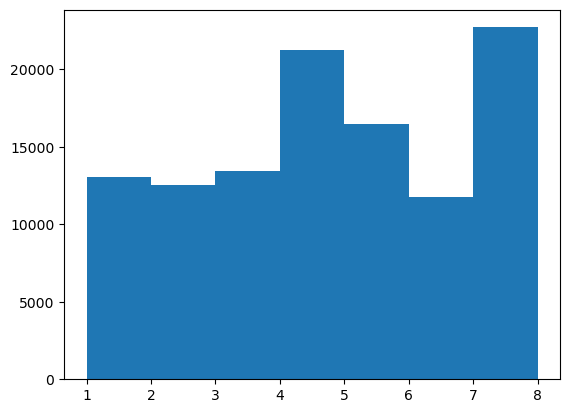

In [36]:
slika, koord = plt.subplots()
koord.hist(answers, bins=range(1, 9))
slika